In [1]:

import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
import requests

In [18]:
types = {'CompetitionOpenSinceYear': np.dtype(int),
         'CompetitionOpenSinceMonth': np.dtype(int),
         'StateHoliday': np.dtype(str),
         'Promo2SinceWeek': np.dtype(int),
         'SchoolHoliday': np.dtype(float),
         'PromoInterval': np.dtype(str)}

In [2]:
train = pd.read_csv("C:/Users/bbalakrishna/pratcice files/train.csv")
test =  pd.read_csv("C:/Users/bbalakrishna/pratcice files/test.csv")

In [34]:
train = pd.read_csv("C:/Users/bbalakrishna/Downloads/rossmann-store-sales/train.csv", parse_dates=[2],dtype=types)

In [35]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train.StateHoliday.replace(mappings, inplace=True)
train.fillna(0, inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null int64
SchoolHoliday    1017209 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 69.8 MB


In [36]:
train.index = train.Date

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263,555,1,1,0,1
2015-07-31,2,5,2015-07-31,6064,625,1,1,0,1
2015-07-31,3,5,2015-07-31,8314,821,1,1,0,1
2015-07-31,4,5,2015-07-31,13995,1498,1,1,0,1
2015-07-31,5,5,2015-07-31,4822,559,1,1,0,1


In [37]:
data = train[['StateHoliday','Sales']]
data.sort_index(inplace=True)

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
data.head()

,StateHoliday,Sales
Date,,
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0


In [14]:
data.tail()

,StateHoliday,Sales
Date,,
2015-07-31,0,9082
2015-07-31,0,10708
2015-07-31,0,7481
2015-07-31,0,10460
2015-07-31,0,5263


In [38]:
# Variables
endog = data.loc['2013':'2015', 'Sales']
exog = sm.add_constant(data.loc['2013':'2015', 'StateHoliday'])


C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
endog

Date
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01     3139
2013-01-01        0
2013-01-01        0
              ...  
2015-07-31     6647
2015-07-31    12761
2015-07-31     8350
2015-07-31    11253
2015-07-31     6230
2015-07-31     9343
2015-07-31    25280
2015-07-31    12426
2015-07-31     8920
2015-07-31     9303
2015-07-31     7763
2015-07-31     4844
2015-07-31     6395
2015-07-31     6612
2015-07-31     7530
2015-07-31     5942
2015-07-31    10548
2015-07-31     9504
2015-07-31    1

In [42]:
endog

Date
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01        0
2013-01-01     3139
2013-01-01        0
2013-01-01        0
              ...  
2015-07-31     6647
2015-07-31    12761
2015-07-31     8350
2015-07-31    11253
2015-07-31     6230
2015-07-31     9343
2015-07-31    25280
2015-07-31    12426
2015-07-31     8920
2015-07-31     9303
2015-07-31     7763
2015-07-31     4844
2015-07-31     6395
2015-07-31     6612
2015-07-31     7530
2015-07-31     5942
2015-07-31    10548
2015-07-31     9504
2015-07-31    1

In [41]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:              1017209
Model:               SARIMAX(1, 0, 1)   Log Likelihood            -9443223.737
Date:                Tue, 07 May 2019   AIC                       18886457.475
Time:                        14:32:08   BIC                       18886516.638
Sample:                             0   HQIC                      18886473.745
                            - 1017209                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5914.2074        nan        nan        nan         nan         nan
StateHoliday -3113.6322     30.250   -102.930      0.000   -3172.921   -3054.343
ar.L1            1.0000   4.65e-06   2.15e+0

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [46]:
train = pd.read_csv("C:/Users/bbalakrishna/Downloads/rossmann-store-sales/train.csv", parse_dates=[2],dtype=types)

In [47]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train.StateHoliday.replace(mappings, inplace=True)
train.fillna(0, inplace=True)

In [48]:
train.index = train.Date
data = train[['StateHoliday','Sales']]
data.sort_index(inplace=True)

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
test.index = test.Date
data = test[['StateHoliday']]
data.sort_index(inplace=True)

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null object
Date             41088 non-null object
Open             41088 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null int64
SchoolHoliday    41088 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.8+ MB


In [49]:
data.head()

,StateHoliday,Sales
Date,,
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0
2013-01-01,1,0


In [52]:
data =data.resample('D').sum()

In [53]:
data

,StateHoliday,Sales
Date,,
2013-01-01,1114,97235
2013-01-02,0,6949829
2013-01-03,0,6347820
2013-01-04,0,6638954
2013-01-05,0,5951593
2013-01-06,309,143904
2013-01-07,0,10826848
2013-01-08,0,8749437
2013-01-09,0,7746603


In [57]:
train = data.loc[:'2015-07-31','Sales']

In [58]:
train.head()

Date
2013-01-01      97235
2013-01-02    6949829
2013-01-03    6347820
2013-01-04    6638954
2013-01-05    5951593
Freq: D, Name: Sales, dtype: int64

In [59]:
exog = data.loc[:'2015-07-31','StateHoliday']

In [60]:
exog.head()

Date
2013-01-01    1114
2013-01-02       0
2013-01-03       0
2013-01-04       0
2013-01-05       0
Freq: D, Name: StateHoliday, dtype: int64

In [61]:
mod = sm.tsa.statespace.SARIMAX(train, exog=exog, trend='n', order=(0,1,0), seasonal_order=(1,1,1,52))
results = mod.fit()

In [115]:
test = pd.read_csv("C:/Users/bbalakrishna/Downloads/rossmann-store-sales/test.csv", parse_dates=[2],dtype=types)
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
test.StateHoliday.replace(mappings, inplace=True)
test.fillna(0, inplace=True)

In [116]:
test['Date'] = pd.to_datetime(test['Date'])

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null object
Date             41088 non-null datetime64[ns]
Open             41088 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null int64
SchoolHoliday    41088 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.5+ MB


In [118]:
test.index=test.Date

In [119]:
test.sort_index(inplace=True)

In [120]:
test.shape

(41088, 8)

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-08-01 to 2015-09-17
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null object
Date             41088 non-null datetime64[ns]
Open             41088 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null int64
SchoolHoliday    41088 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.8+ MB


In [121]:
test = test[['StateHoliday']]

In [122]:
test.shape

(41088, 1)

In [123]:
test =test.resample('D').sum()

In [124]:
test.shape

(48, 1)

In [125]:
ex = test.loc['2015-08-01':'2015-09-17','StateHoliday']


In [128]:
ex = pd.DataFrame(ex)

In [129]:
ex.shape

(48, 1)

In [130]:
#exog_forecast = data.loc['2012-12-13':'2016-12-22',,'Daily mean temp']
predictions = results.predict(start = '2015-08-01', end = '2015-09-17', exog=ex, dynamic= True)

C:\Users\bbalakrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [136]:
predict = res.get_prediction()
predict_ci = predict.conf_int()

IndexingError: Too many indexers

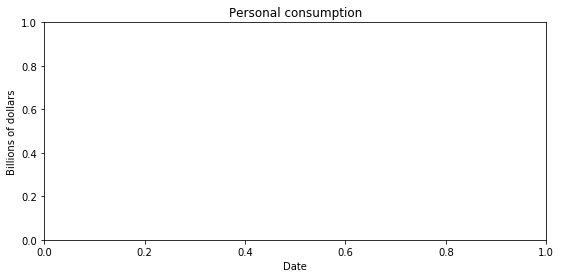

In [138]:
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')
train.loc['2015-08-01':, 'Sales'].plot(ax=ax, style='o', label='Observed')

predict.predicted_mean.loc['2015-08-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2015-08-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)